In [0]:
# https://keras-team.github.io/keras-tuner/

# CASE STUDY

# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying. (6 class classification)

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


# These 561 features are engineered features from 6 time series data

No of Features: 561


## Obtain the  train data 

In [0]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,subject,Activity,ActivityName
6681,0.277258,-0.017145,-0.108763,-0.994575,-0.988155,-0.983139,-0.994868,-0.987543,-0.982701,-0.940022,-0.569013,-0.817989,0.850072,0.690739,0.837101,-0.991235,-0.999962,-0.999928,-0.999639,-0.994961,-0.986553,-0.98131,-0.596494,-0.627498,-0.526961,0.341214,-0.211371,0.063792,0.263717,0.248123,-0.206839,0.25816,-0.067243,0.335847,-0.222935,0.25661,-0.343982,-0.519094,-0.472496,0.523794,...,-0.936508,0.469902,-0.698092,-0.90046,-0.991516,-0.988888,-0.988379,-0.992243,-0.995675,-0.991516,-0.999901,-0.993761,-0.79429,-0.948718,-0.159711,-0.443281,-0.807756,-0.997305,-0.996995,-0.996895,-0.997743,-0.998604,-0.997305,-0.999988,-0.997279,-1.0,-0.904762,0.369583,-0.454124,-0.803242,0.441056,-0.447106,0.208235,-0.247208,-0.661197,-0.039278,-0.180279,29,4,SITTING


In [0]:
train.shape

(7352, 564)

## Obtain the  test data 

In [0]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,subject,Activity,ActivityName
252,0.24387,0.011467,-0.113891,-0.411686,-0.079688,-0.44214,-0.453154,-0.126569,-0.416316,-0.377307,-0.07352,-0.357745,0.254298,-0.010342,0.595292,-0.279333,-0.82538,-0.8344,-0.856891,-0.551703,-0.405894,-0.440279,0.312541,0.463913,0.092705,-0.257547,0.347661,-0.244043,0.109792,-0.352068,0.526668,-0.377871,0.233971,-0.246164,0.320062,-0.192444,-0.019948,-0.283655,0.168617,0.433072,...,-0.873016,0.075165,0.222099,-0.165925,-0.475683,-0.639736,-0.5799,-0.745726,-0.807022,-0.475683,-0.882609,-0.540759,0.555118,-0.333333,0.415956,-0.597663,-0.867264,-0.505087,-0.430085,-0.430392,-0.414939,-0.669355,-0.505087,-0.849772,-0.359581,0.461172,-0.873016,0.083846,0.1142,-0.2436,0.492926,-0.676361,-0.478237,0.852333,-0.650023,0.317403,-0.084943,2,1,WALKING


In [0]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [0]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [0]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

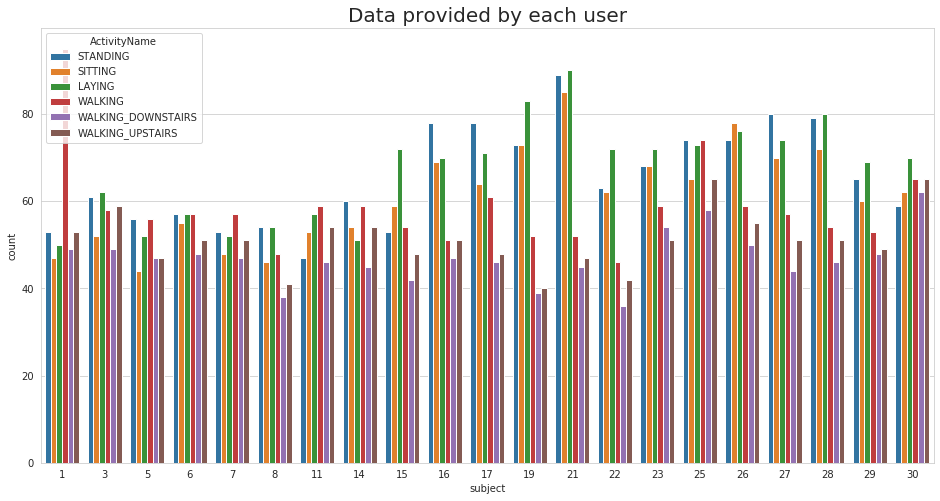

In [0]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

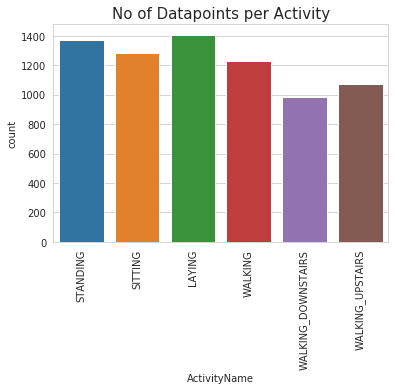

In [0]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [0]:
"""
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns
"""

"\ncolumns = train.columns\n\n# Removing '()' from column names\ncolumns = columns.str.replace('[()]','')\ncolumns = columns.str.replace('[-]', '')\ncolumns = columns.str.replace('[,]','')\n\ntrain.columns = columns\ntest.columns = columns\n\ntest.columns\n"

## 5. Save this dataframe in a csv files

In [0]:
"""
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)"""

"\ntrain.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)\ntest.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)"

###Reading the data 

In [0]:
train = pd.read_csv("/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/csv_files/train.csv")
test = pd.read_csv("/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/csv_files/test.csv")

In [0]:
train.head(2)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.80276,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.0,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.90016,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.0,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING


# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

In [0]:
train['tBodyAccMagmean']

0      -0.959434
1      -0.979289
2      -0.983703
3      -0.986542
4      -0.992827
          ...   
7347   -0.031719
7348   -0.065256
7349   -0.003936
7350   -0.002445
7351   -0.049090
Name: tBodyAccMagmean, Length: 7352, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


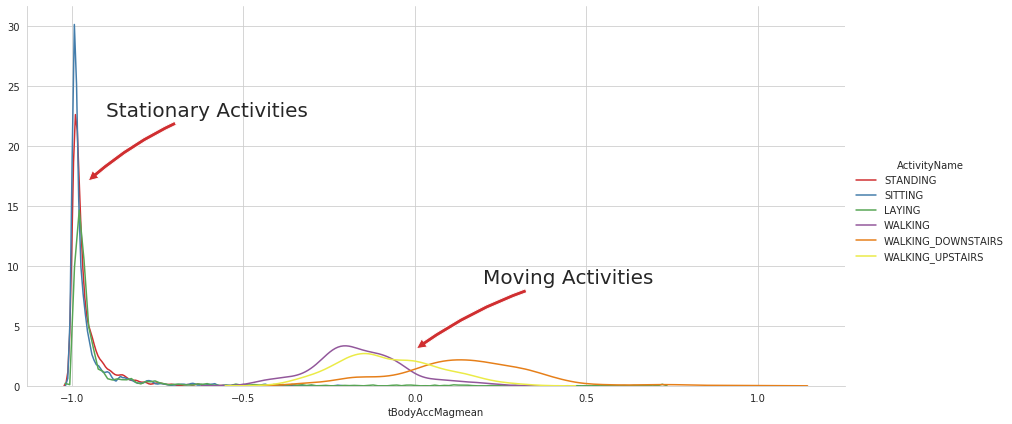

In [0]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

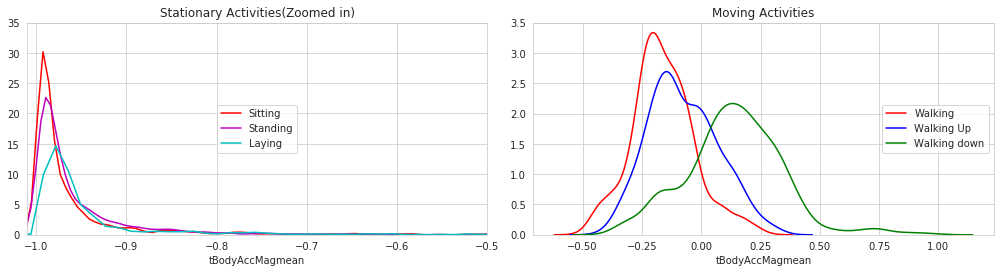

In [0]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

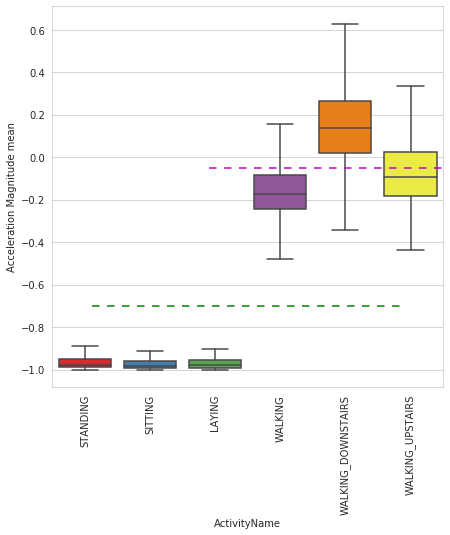

In [0]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

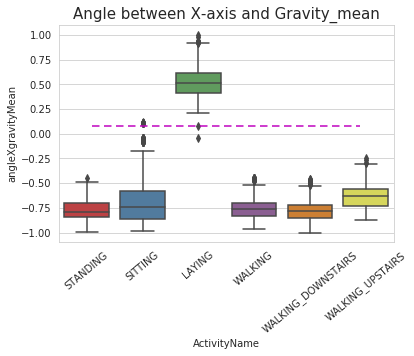

In [0]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

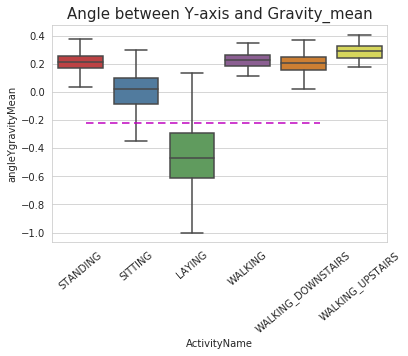

In [0]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [0]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.128s...
[t-SNE] Computed neighbors for 7352 samples in 32.332s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.041s
[t-SNE] Iteration 50: error = 124.7317047, gradient norm = 0.0300142 (50 iterations in 3.493s)
[t-SNE] Iteration 100: error = 107.1304245, gradient norm = 0.0273806 (50 iterations in

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


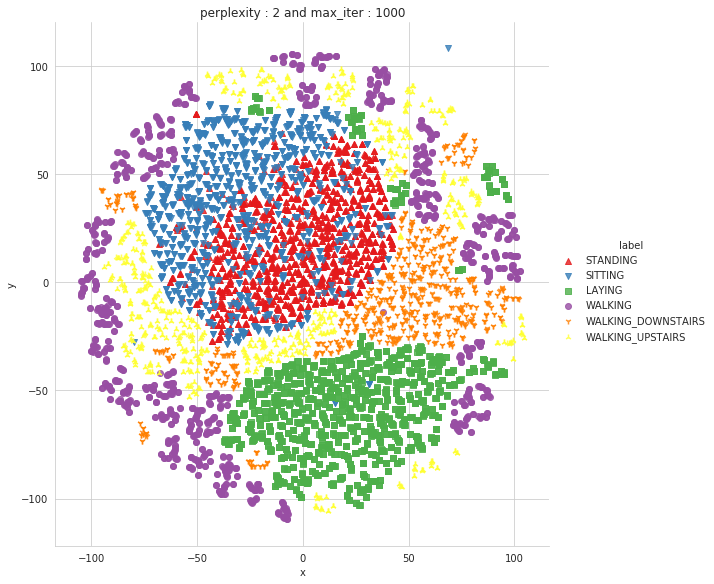

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.148s...
[t-SNE] Computed neighbors for 7352 samples in 32.623s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.056s
[t-SNE] Iteration 50: error = 113.8297501, gradient norm = 0.0232357 (50 iterations in 3.083s)
[t-SNE] Iteration 100: error = 97.4184952, gradient norm = 0.0152595 (50 iteratio

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


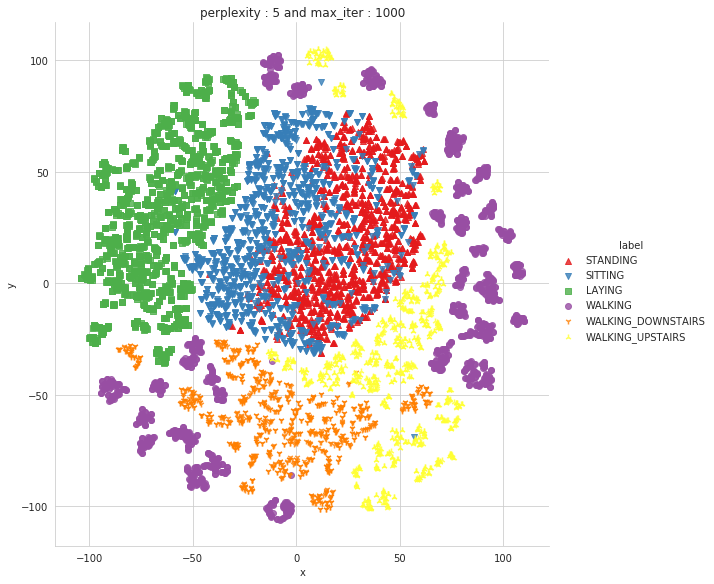

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.147s...
[t-SNE] Computed neighbors for 7352 samples in 33.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.104s
[t-SNE] Iteration 50: error = 106.0332108, gradient norm = 0.0183357 (50 iterations in 3.304s)
[t-SNE] Iteration 100: error = 90.7846985, gradient norm = 0.0104378 (50 iterati

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


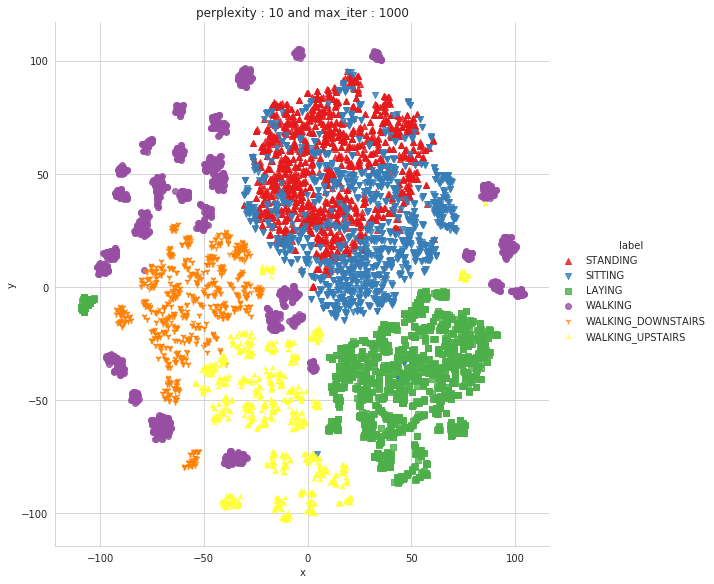

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.130s...
[t-SNE] Computed neighbors for 7352 samples in 33.978s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.216s
[t-SNE] Iteration 50: error = 97.1100311, gradient norm = 0.0230588 (50 iterations in 3.131s)
[t-SNE] Iteration 100: error = 84.0396347, gradient norm = 0.0076007 (50 iteratio

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


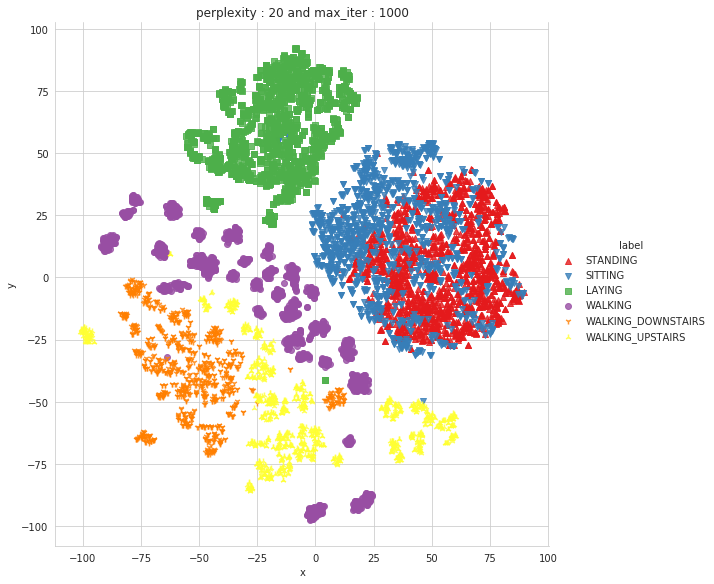

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.134s...
[t-SNE] Computed neighbors for 7352 samples in 34.778s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.514s
[t-SNE] Iteration 50: error = 87.1640396, gradient norm = 0.0111959 (50 iterations in 3.705s)
[t-SNE] Iteration 100: error = 75.5655212, gradient norm = 0.0036183 (50 iterati

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


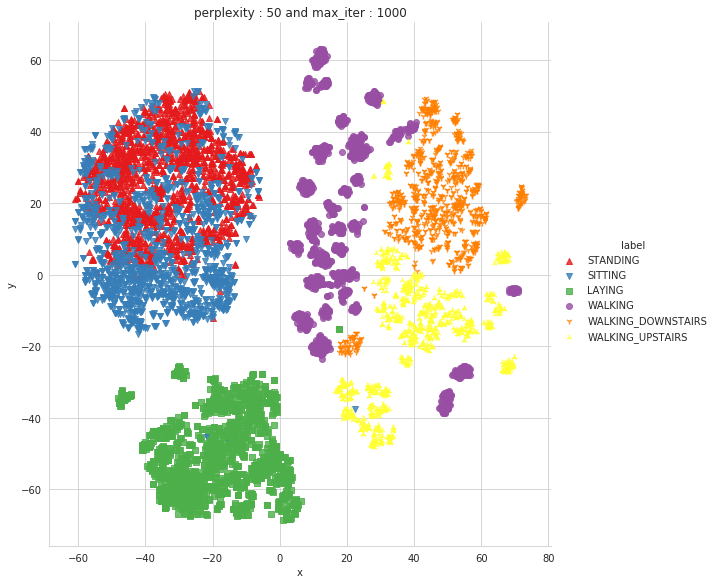

Done


In [0]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

# (2)

In [0]:
import numpy as np
import pandas as pd

## Obtain the train and test data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train = pd.read_csv('/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [0]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [0]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [0]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [0]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [0]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [0]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model

    return results
    
    

### Method to print the gridsearch Attributes

In [0]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


# 1. Logistic Regression with Grid Search

In [0]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:02:03.171029


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008114


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


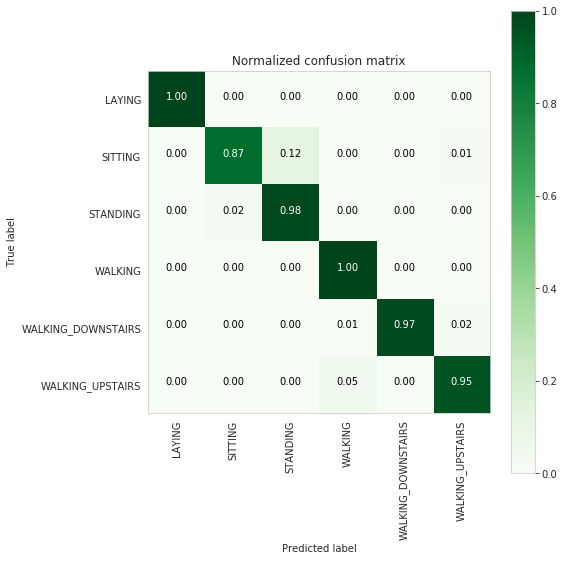

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [0]:

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


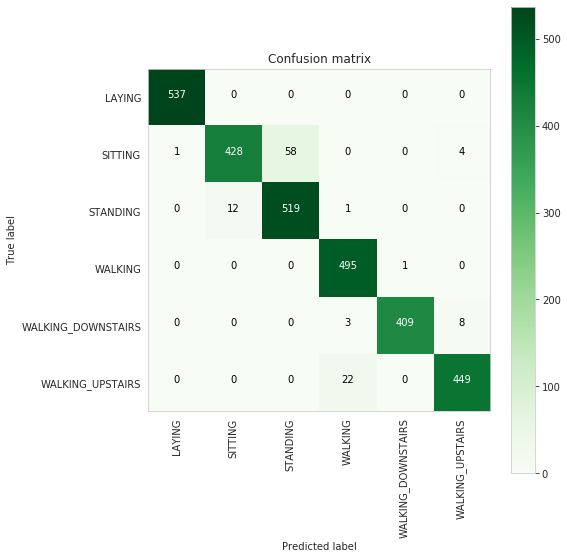

In [0]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [0]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



#  2. Linear SVC with GridSearch

In [0]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   33.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:37.207699


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.007092


---------------------
|      Accuracy      |
---------------------

    0.9667458432304038


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 429  57   0   0   3]
 [  0  11 520   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]


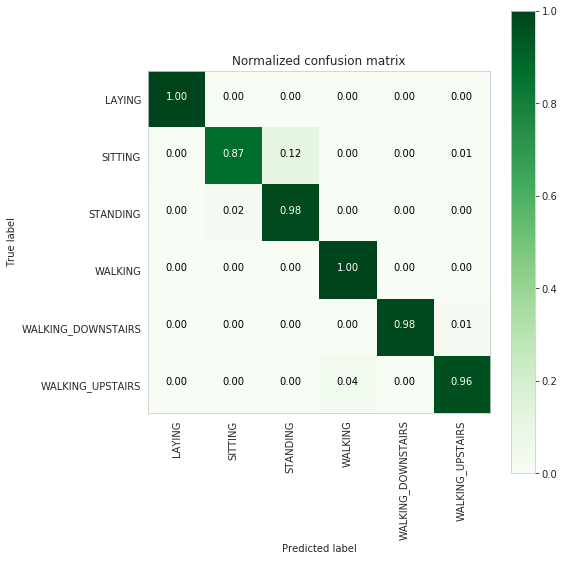

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [0]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [0]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9457290533188248



# 3.  Kernel SVM with GridSearch

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:05:44.825178


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.589071


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


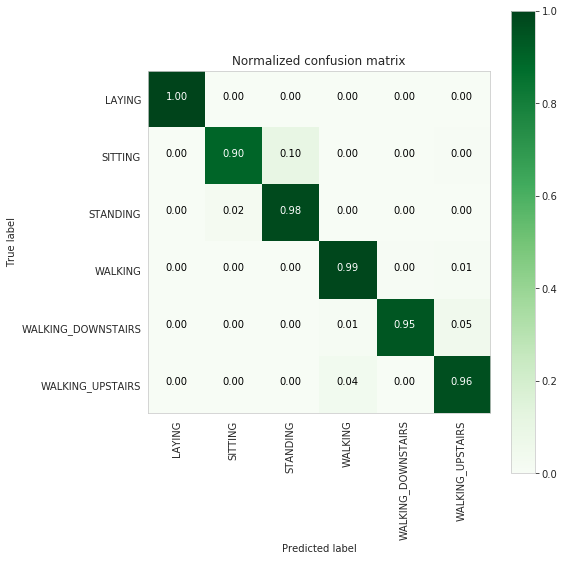

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [0]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [0]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# 4. Decision Trees with GridSearchCV

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:14.864141


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.004863


---------------------
|      Accuracy      |
---------------------

    0.8632507634882932


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 389 102   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 470  18   8]
 [  0   0   0  19 340  61]
 [  0   0   0  68  34 369]]


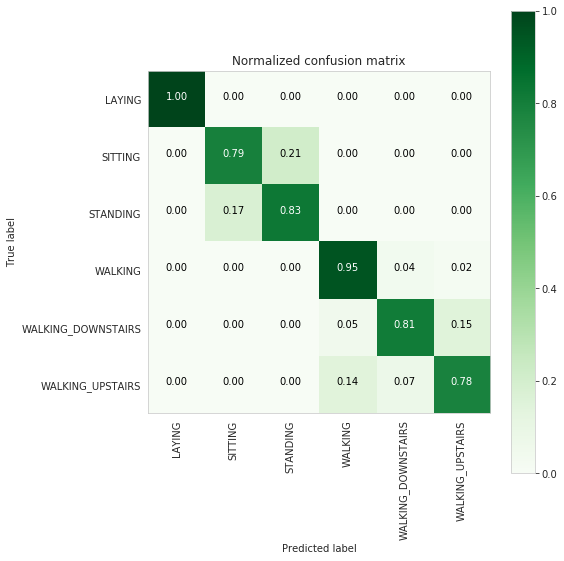

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.87      0.81      0.84       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       mi

In [0]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:10:04.968071


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.014626


---------------------
|      Accuracy      |
---------------------

    0.9002375296912114


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 409  82   0   0   0]
 [  0  53 479   0   0   0]
 [  0   0   0 482  10   4]
 [  0   0   0  36 334  50]
 [  0   0   0  53   6 412]]


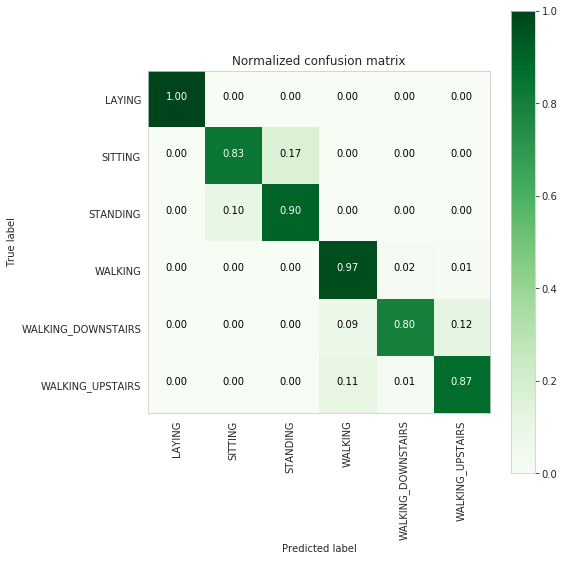

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.83      0.86       491
          STANDING       0.85      0.90      0.88       532
           WALKING       0.84      0.97      0.90       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.88      0.87      0.88       471

          accuracy                           0.90      2947
         macro avg       0.90      0.90      0.90      2947
      weighted avg       0.90      0.90      0.90      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
       

In [0]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6.  Gradient Boosted Decision Trees With GridSearch

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



# 7. Comparing all models

In [0]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))

> We can choose ___Logistic regression___ or ___Linear SVC___ or ___rbf SVM___.

# Conclusion :

In the real world, domain-knowledge, EDA and feature-engineering matter most.

# Case study Assignment

#### Importing library and defining some function

In [0]:
import pandas as pd
import numpy as np
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional
from keras.layers.core import Dense, Dropout
# Import Keras
from keras import backend as K
from keras.utils import plot_model
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [0]:
def plt_dynamic(history):

    x = list(range(len(history.history['val_loss'])))
    vy = history.history['val_loss']
    ty = history.history['loss']
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch')
    ax.set_ylabel('Crossentropy Loss')
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()

    vya = history.history['val_acc']
    tya = history.history['acc']
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch')
    ax.set_ylabel('Accuracy')
    ax.plot(x, vya, 'b', label="Validation Accuarcy")
    ax.plot(x, tya, 'r', label="Train Accuracy")

    plt.legend()
    fig.canvas.draw()

In [0]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data

In [0]:
# Data directory
DATADIR = '/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset'

In [0]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [0]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [0]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [0]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [0]:
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [0]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [0]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [0]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [0]:
print(type(X_train))
print(type(X_test))
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7352, 128, 9)
(2947, 128, 9)
(7352, 6)
(2947, 6)


In [0]:
print(X_train[0].shape)
print(X_train[0][0].shape)
print(X_train[0][0])  # At time 1, total 9 frequency

(128, 9)
(9,)
[ 1.808515e-04  1.076681e-02  5.556068e-02  3.019122e-02  6.601362e-02
  2.285864e-02  1.012817e+00 -1.232167e-01  1.029341e-01]


In [0]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


- Defining the Architecture of LSTM

In [0]:
# https://stats.stackexchange.com/questions/264546/difference-between-samples-time-steps-and-features-in-neural-network
print(timesteps) # time step is like, sending the data to same LSTM cell 
print(input_dim)

128
9


In [0]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

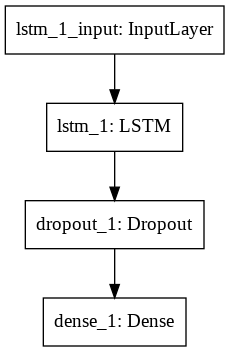

In [0]:
plot_model(model, to_file='model.png')

In [0]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7352 samples, validate on 2947 samples
Epoch 1/30




7352/7352 [==============================] - 83s 11ms/step - loss: 1.3516 - acc: 0.4373 - val_loss: 1.1546 - val_acc: 0.4968
Epoch 2/30
7352/7352 [==============================] - 77s 11ms/step - loss: 0.9905 - acc: 0.5813 - val_loss: 0.9254 - val_acc: 0.5789
Epoch 3/30
7352/7352 [==============================] - 76s 10ms/step - loss: 0.7942 - acc: 0.6484 - val_loss: 0.8159 - val_acc: 0.6138
Epoch 4/30
7352/7352 [==============================] - 76s 10ms/step - loss: 0.7300 - acc: 0.6591 - val_loss: 0.7393 - val_acc: 0.6162
Epoch 5/30
7352/7352 [==============================] - 76s 10ms/step - loss: 0.6787 - acc: 0.6634 - val_loss: 0.7693 - val_acc: 0.6223
Epoch 6/30
7352/7352 [==============================] - 77s 10ms/step - loss: 0.6399 - acc: 0.6715 - val_loss: 0.7240 - val_acc: 0.6203
Epoch 7/30
7352/7352 [==============

In [0]:
# Confusion Matrix
confusion_matrix(Y_test, model.predict(X_test))

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,510,0,0,0,0,27
SITTING,0,392,98,0,1,0
STANDING,0,94,437,1,0,0
WALKING,0,0,0,455,29,12
WALKING_DOWNSTAIRS,0,0,0,6,408,6
WALKING_UPSTAIRS,0,3,0,0,37,431


In [0]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 5s 2ms/step


In [0]:
score

[0.46790618231734715, 0.8934509670851714]

- With a simple 2 layer architecture we got 89.34% accuracy and a loss of 0.46
- We can further imporve the performace with Hyperparameter tuning

# Assignment

# LSTM Architecture_1 (double Stacked LSTM layer)

#### Early stopping

In [0]:
# To avoid overfitting
es_val_acc = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=3)

In [0]:
n_hidden1 = 64
n_hidden2 = 32
batch_size = 32

In [0]:
# Initiliazing the sequential model
model = Sequential()
# LSTM layer
model.add(LSTM(n_hidden1,return_sequences=True, input_shape=(timesteps, input_dim)))
# Adding one more LSTM
model.add(LSTM(n_hidden2))
# Adding a dropout layer to avoid over fitting
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='relu',kernel_initializer='he_normal'))


model.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 31,558
Trainable params: 31,558
Non-trainable params: 0
_________________________________________________________________


In [0]:
adam = keras.optimizers.adam(lr=0.0001)
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fitting the model
history = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=6, callbacks = [es_val_acc])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7352 samples, validate on 2947 samples
Epoch 1/6




7352/7352 [==============================] - 122s 17ms/step - loss: 0.7099 - acc: 0.8270 - val_loss: 0.3890 - val_acc: 0.8598
Epoch 2/6
7352/7352 [==============================] - 114s 16ms/step - loss: 0.4359 - acc: 0.8390 - val_loss: 0.3708 - val_acc: 0.8581
Epoch 3/6
7352/7352 [==============================] - 114s 15ms/step - loss: 0.3667 - acc: 0.8483 - val_loss: 0.3650 - val_acc: 0.8436
Epoch 4/6
7352/7352 [==============================] - 115s 16ms/step - loss: 0.3759 - acc: 0.8481 - val_loss: 0.3660 - val_acc: 0.8479
Epoch 00004: early stopping


In [0]:
confusion_matrix(Y_test, model.predict(X_test))
score = model.evaluate(X_test, Y_test)
print(score)

2947/2947 [==============================] - 16s 5ms/step
[0.36603105906555117, 0.8479244250097556]


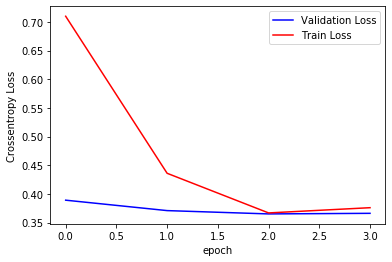

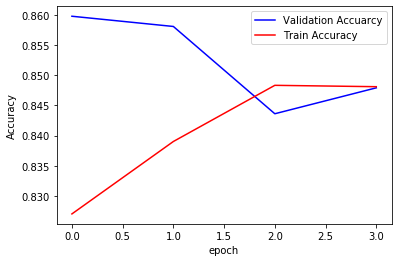

In [0]:
plt_dynamic(history)

## Observation

* Accuracy for Two layer LSTM is 0.87 without any hyperparameter tuning
* As you see in confusion matrix, Standing is misclasssifed into Laying and Sitting 
* With in 4 epoch, the model loss starts increasing again, further tuning is needed for Double stacked LSTM architecture

# LSTM (One layer Grid search)

In [0]:
print(timesteps)
print(input_dim)

128
9


In [0]:
def create_model(n_hidden=32, dropout_rate=0.5):
  model = Sequential()
  model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(n_classes, activation='relu',kernel_initializer='he_normal'))
  # compiling the model
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

In [0]:
print(X_train.shape)
print(Y_train.shape)

(7352, 128, 9)
(7352, 6)


In [0]:
n_hidden = [16,32,64,128,256]
dropout_rate = [0.3,0.4,0.5]
param_grid = dict(n_hidden=n_hidden, dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=10)
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 23.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 56.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 80.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 125.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 161.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 217.0min


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 258.0min finished



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.882753 using {'dropout_rate': 0.3, 'n_hidden': 64}


In [0]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.859154 (0.003988) with: {'dropout_rate': 0.3, 'n_hidden': 16}
0.867179 (0.014123) with: {'dropout_rate': 0.3, 'n_hidden': 32}
0.882753 (0.007467) with: {'dropout_rate': 0.3, 'n_hidden': 64}
0.862668 (0.023109) with: {'dropout_rate': 0.3, 'n_hidden': 128}
0.845802 (0.014050) with: {'dropout_rate': 0.3, 'n_hidden': 256}
0.856978 (0.006618) with: {'dropout_rate': 0.4, 'n_hidden': 16}
0.848771 (0.008839) with: {'dropout_rate': 0.4, 'n_hidden': 32}
0.862237 (0.009721) with: {'dropout_rate': 0.4, 'n_hidden': 64}
0.866204 (0.016814) with: {'dropout_rate': 0.4, 'n_hidden': 128}
0.840814 (0.010024) with: {'dropout_rate': 0.4, 'n_hidden': 256}
0.855255 (0.009837) with: {'dropout_rate': 0.5, 'n_hidden': 16}
0.839341 (0.004868) with: {'dropout_rate': 0.5, 'n_hidden': 32}
0.861489 (0.014007) with: {'dropout_rate': 0.5, 'n_hidden': 64}
0.875589 (0.015047) with: {'dropout_rate': 0.5, 'n_hidden': 128}
0.791780 (0.086794) with: {'dropout_rate': 0.5, 'n_hidden': 256}


## Observation:

* Here hyperparamters Dropout_rate and nummber of hidden neurons are tuned for single layer LSTM 
* The accuracy achieved is 0.88 which is better than two layer LSTM without hyperparameter tuning

# LSTM (Two layer Grid search)

In [0]:
# # https://stackoverflow.com/questions/49093797/keras-callbacks-with-cv-grid-search

In [0]:
from sklearn.model_selection import GridSearchCV
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
print(timesteps)
print(input_dim)
print(X_train.shape)
print(Y_train.shape)
# Fixing constant = Eppochs, optimixer, batch_size
# Finding optimum for = n_hidden in LSTM and Droput rate

128
9
(7352, 128, 9)
(7352, 6)


In [0]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('/content/gdrive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Human_activiy_Reg/log.csv', append=True, separator=';')

In [0]:
# EARLY STOPPING BASED ON VALIDATION ACCURACY
es_val_acc = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=2)


class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        #print(logs.get('loss'))

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        #print(logs.get('loss'))

In [0]:
def create_model(n_hidden1=32,n_hidden2=32, dropout_rate1=0.5, dropout_rate2=0.5):
  model = Sequential()
  model.add(LSTM(n_hidden1,return_sequences=True, input_shape=(timesteps, input_dim)))
  model.add(Dropout(dropout_rate1))
  model.add(LSTM(n_hidden2))
  model.add(Dropout(dropout_rate2))
  model.add(Dense(n_classes, activation='relu',kernel_initializer='he_normal'))
  # compiling the model
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
model = KerasClassifier(build_fn=create_model, epochs=1, batch_size=32, verbose=0)

In [0]:
history = LossHistory()

In [0]:
n_hidden1= [32,64,128]
dropout_rate1 = [0.3,0.5]
n_hidden2= [32,64,128]
dropout_rate2 = [0.3,0.5]
param_grid = dict(n_hidden1=n_hidden1, dropout_rate1=dropout_rate1,n_hidden2=n_hidden2, dropout_rate2=dropout_rate2)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=10)
grid_result = grid.fit(X_train, Y_train, callbacks=[es_val_acc, csv_logger])

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.7min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 52.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done 




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.868381 using {'dropout_rate1': 0.5, 'dropout_rate2': 0.3, 'n_hidden1': 64, 'n_hidden2': 32}


In [0]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.857794 (0.002582) with: {'dropout_rate1': 0.3, 'dropout_rate2': 0.3, 'n_hidden1': 32, 'n_hidden2': 32}
0.840473 (0.007906) with: {'dropout_rate1': 0.3, 'dropout_rate2': 0.3, 'n_hidden1': 32, 'n_hidden2': 64}
0.852513 (0.007910) with: {'dropout_rate1': 0.3, 'dropout_rate2': 0.3, 'n_hidden1': 32, 'n_hidden2': 128}
0.851378 (0.010979) with: {'dropout_rate1': 0.3, 'dropout_rate2': 0.3, 'n_hidden1': 64, 'n_hidden2': 32}
0.835060 (0.038918) with: {'dropout_rate1': 0.3, 'dropout_rate2': 0.3, 'n_hidden1': 64, 'n_hidden2': 64}
0.850631 (0.007922) with: {'dropout_rate1': 0.3, 'dropout_rate2': 0.3, 'n_hidden1': 64, 'n_hidden2': 128}
0.859560 (0.013847) with: {'dropout_rate1': 0.3, 'dropout_rate2': 0.3, 'n_hidden1': 128, 'n_hidden2': 32}
0.850994 (0.011546) with: {'dropout_rate1': 0.3, 'dropout_rate2': 0.3, 'n_hidden1': 128, 'n_hidden2': 64}
0.815611 (0.051036) with: {'dropout_rate1': 0.3, 'dropout_rate2': 0.3, 'n_hidden1': 128, 'n_hidden2': 128}
0.857545 (0.005293) with: {'dropout_rate1': 0.3, 

### Observation

* Here, two layer LSTM is done with hyperparmeter tuning of Hidden_layer1, Hidden_layer2, dropout_rate1,dropout_rate2

* The best score achieved is 0.86 for the following parameters: {'dropout_rate1': 0.5, 'dropout_rate2': 0.3, 'n_hidden1': 64, 'n_hidden2': 32}


* Let's further tune the other parameters with these best parameters combination

# Picking best of two layer LSTM param and tuning further

In [0]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='sigmoid',kernel_initializer='he_normal'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Fitting with early stopping

for x in [32,64,128]:
  model.fit(X_train,
            Y_train,
            batch_size=x,
            validation_data=(X_test, Y_test),
            epochs=20, callbacks = [es_val_acc])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128, 64)           18944     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
Total params: 31,558
Trainable params: 31,558
Non-trainable params: 0
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 88s 12ms/ste

### Observation:

* As we see, the batch_size 128 gives the best accuracy as compared to other batch_size.

* Let's pick all the best combination of Double stacked LSTM and form a model

# Picking stacked LSTM best param and best batch_size

In [0]:
# BEST HYPER-PARAMETERS FOR 2-LAYER LSTM
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='sigmoid',kernel_initializer='he_normal'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(X_train,
            Y_train,
            batch_size=128,
            validation_data=(X_test, Y_test),
            epochs=20, callbacks = [es_val_acc])

confusion_matrix(Y_test, model.predict(X_test))
score = model.evaluate(X_test, Y_test)
print(score)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 31,558
Trainable params: 31,558
Non-trainable params: 0
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 30s 4ms/step

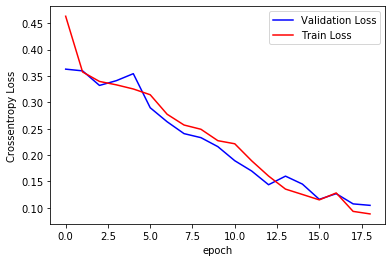

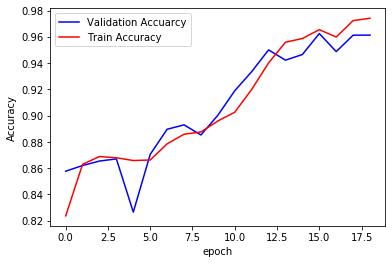

In [0]:
plt_dynamic(history)

## Observation

- With a 2 layer LSTM architecture we got 96.1% accuracy and a loss of 0.104
(with hyperparameter tuning)


# Simple Bidirectional LSTM

In [0]:
import keras
from keras.layers import Dense, Flatten
adam = keras.optimizers.adam(lr=0.0001)

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(LSTM(32))
#model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Dense(6, activation='sigmoid',kernel_initializer='he_normal'))
# Summary
model.summary()
# Compiling the model
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 128, 128)          37888     
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 198       
Total params: 62,886
Trainable params: 62,886
Non-trainable params: 0
__________________________________________________

In [0]:
history = model.fit(X_train,
            Y_train,
            batch_size=16,
            validation_data=(X_test, Y_test),
            epochs=20, callbacks = [es_val_acc])

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 331s 45ms/step - loss: 0.4348 - acc: 0.8288 - val_loss: 0.3154 - val_acc: 0.8698
Epoch 2/20
7352/7352 [==============================] - 320s 44ms/step - loss: 0.2921 - acc: 0.8763 - val_loss: 0.2939 - val_acc: 0.8743
Epoch 3/20
7352/7352 [==============================] - 327s 45ms/step - loss: 0.2596 - acc: 0.8851 - val_loss: 0.2564 - val_acc: 0.8869
Epoch 4/20
7352/7352 [==============================] - 327s 44ms/step - loss: 0.2355 - acc: 0.8940 - val_loss: 0.2393 - val_acc: 0.8947
Epoch 5/20
7352/7352 [==============================] - 328s 45ms/step - loss: 0.2379 - acc: 0.8955 - val_loss: 0.2471 - val_acc: 0.8972
Epoch 6/20
7352/7352 [==============================] - 324s 44ms/step - loss: 0.2104 - acc: 0.9063 - val_loss: 0.2332 - val_acc: 0.8977
Epoch 7/20
7352/7352 [==============================] - 329s 45ms/step - loss: 0.1899 - acc: 0.9129 - val_loss: 0.2374 - val_acc: 

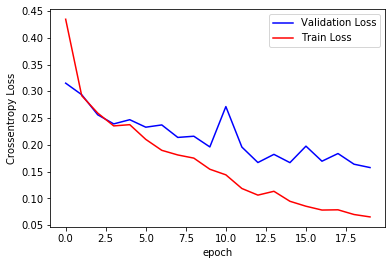

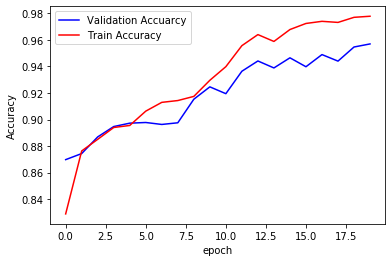

In [0]:
plt_dynamic(history)

In [0]:
score = model.evaluate(X_test, Y_test)
print(score)

2947/2947 [==============================] - 22s 7ms/step
[0.15772984551951133, 0.9569618871020268]


In [0]:
confusion_matrix(Y_test, model.predict(X_test))

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,510,0,0,0,0,27
SITTING,0,382,80,3,0,26
STANDING,0,89,424,4,0,15
WALKING,0,0,3,449,17,27
WALKING_DOWNSTAIRS,0,0,0,34,382,4
WALKING_UPSTAIRS,0,0,0,5,43,423


### Observation:

* Here, simple Architecture with Stacking of Bidirectional LSTM with normal LSTM gives 95.6% Accuracy

* Loss: 0.157

* Still this Stacked Bidirectional LSTM Architecture can be hyperparameter tuned to increase the accuracy. Since, the training time for Bidirectional LSTM is longer the tuning is not performed 

* Without any Tuning: 95.6% Accuracy which is par with Classical model with 500+ expert engineered features

# CNN ARCHITECTURE

In [0]:
# https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.initializers import glorot_uniform,glorot_normal 
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import plot_model

In [0]:
print(type(X_train))
print(type(X_test))
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7352, 128, 9)
(2947, 128, 9)
(7352, 6)
(2947, 6)


In [0]:
X_train[0].shape

(128, 9)

In [0]:
X_train[0]

array([[ 1.808515e-04,  1.076681e-02,  5.556068e-02, ...,  1.012817e+00,
        -1.232167e-01,  1.029341e-01],
       [ 1.013856e-02,  6.579480e-03,  5.512483e-02, ...,  1.022833e+00,
        -1.268756e-01,  1.056872e-01],
       [ 9.275574e-03,  8.928878e-03,  4.840473e-02, ...,  1.022028e+00,
        -1.240037e-01,  1.021025e-01],
       ...,
       [-1.147484e-03,  1.714439e-04,  2.647864e-03, ...,  1.018445e+00,
        -1.240696e-01,  1.003852e-01],
       [-2.222655e-04,  1.574181e-03,  2.381057e-03, ...,  1.019372e+00,
        -1.227451e-01,  9.987355e-02],
       [ 1.575500e-03,  3.070189e-03, -2.269757e-03, ...,  1.021171e+00,
        -1.213260e-01,  9.498741e-02]])

In [0]:
X_train = X_train.reshape(X_train.shape[0], timesteps, input_dim, 1)
X_test = X_test.reshape(X_test.shape[0], timesteps, input_dim, 1)

In [0]:
# Simple CNN with one Convolution layer (5x5 kernel) -->  flatten_layer --> dense layer --> Output layer
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu', padding='same', input_shape=(128,9,1)))
model.add(Flatten()) # flattening before sending into dense layer
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))   # 6 class classification
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 9, 64)        1664      
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               7372900   
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 606       
Total params: 7,375,170
Trainable params: 7,375,170
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=12, epochs=30, verbose=1, validation_data=(X_test, Y_test,), callbacks = [es_val_acc])

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 11s 1ms/step - loss: 0.1053 - acc: 0.9567 - val_loss: 0.1325 - val_acc: 0.9553
Epoch 2/30
7352/7352 [==============================] - 4s 554us/step - loss: 0.0568 - acc: 0.9768 - val_loss: 0.1273 - val_acc: 0.9585
Epoch 3/30
7352/7352 [==============================] - 4s 564us/step - loss: 0.0435 - acc: 0.9823 - val_loss: 0.1843 - val_acc: 0.9523
Epoch 4/30
7352/7352 [==============================] - 4s 546us/step - loss: 0.0437 - acc: 0.9829 - val_loss: 0.1238 - val_acc: 0.9613
Epoch 5/30
7352/7352 [==============================] - 4s 548us/step - loss: 0.0351 - acc: 0.9852 - val_loss: 0.1407 - val_acc: 0.9634
Epoch 6/30
7352/7352 [==============================] - 4s 554us/step - loss: 0.0324 - acc: 0.9868 - val_loss: 0.1050 - val_acc: 0.9668
Epoch 7/30
7352/7352 [==============================] - 4s 567us/step - loss: 0.0491 - acc: 0.9812 - val_loss: 0.1150 - val_acc: 0.9687
E

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15476448757309708
Test accuracy: 0.9674245098464805


In [0]:
def plt_dynamic(x, vy, ty, colors=['b']):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch')
    ax.set_ylabel('Crossentropy Loss')
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    fig.canvas.draw()

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,537,0,0,0,0,0
SITTING,0,415,52,0,0,24
STANDING,0,95,431,1,0,5
WALKING,0,0,0,449,39,8
WALKING_DOWNSTAIRS,0,0,0,2,414,4
WALKING_UPSTAIRS,0,0,0,9,49,413


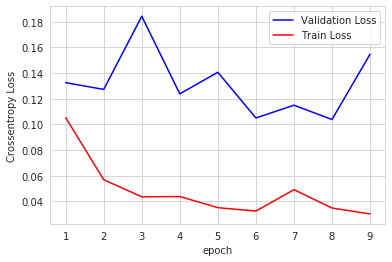

In [0]:
x = list(range(1,9+1))  # as the model stopped at 9th epoch because of early stopping
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty)
confusion_matrix(Y_test, model.predict(X_test))

## Observation

* As we see, simple 2-d CNN have 96% accuracy with loss of 0.15
* As see in confusion matrix, Sitting and Standing are getting mixed up
* Also model won't completely differentiate between Walking and Walking_downstairs
* Lets built deeper CNN to abstract more details from Data

## Deeper CNN

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 9, 256)       6656      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 9, 128)       524416    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 9, 64)        73792     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 9, 32)        18464     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 9, 16)        4624      
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)            

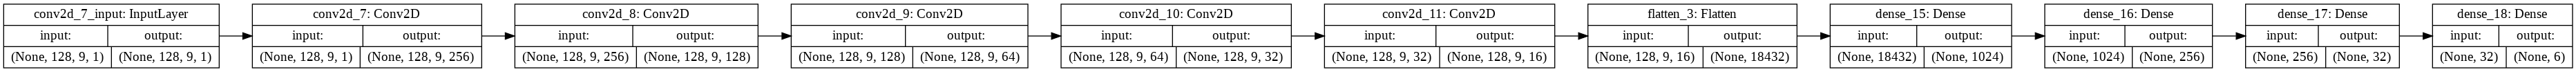

In [0]:
# Simple CNN with one Convolution layer (5x5 kernel) -->  flatten_layer --> dense layer --> Output layer
model = Sequential()
model.add(Conv2D(256, kernel_size=(5, 5),activation='relu', padding='same', input_shape=(128,9,1)))
model.add(Conv2D(128, kernel_size=(4,4), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Conv2D(16, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Flatten()) # flattening before sending into dense layer
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(6, activation='softmax'))   # 6 class classification
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, rankdir="LR")

In [0]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=12, epochs=30, verbose=1, validation_data=(X_test, Y_test,), callbacks = [es_val_acc])

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 17s 2ms/step - loss: 0.1327 - acc: 0.9445 - val_loss: 0.1607 - val_acc: 0.9526
Epoch 2/30
7352/7352 [==============================] - 14s 2ms/step - loss: 0.0584 - acc: 0.9774 - val_loss: 0.1152 - val_acc: 0.9582
Epoch 3/30
7352/7352 [==============================] - 14s 2ms/step - loss: 0.0576 - acc: 0.9788 - val_loss: 0.0951 - val_acc: 0.9649
Epoch 4/30
7352/7352 [==============================] - 14s 2ms/step - loss: 0.0500 - acc: 0.9803 - val_loss: 0.0807 - val_acc: 0.9659
Epoch 5/30
7352/7352 [==============================] - 14s 2ms/step - loss: 0.0463 - acc: 0.9820 - val_loss: 0.1140 - val_acc: 0.9694
Epoch 6/30
7352/7352 [==============================] - 14s 2ms/step - loss: 0.0536 - acc: 0.9799 - val_loss: 0.3358 - val_acc: 0.9507
Epoch 7/30
7352/7352 [==============================] - 14s 2ms/step - loss: 0.0535 - acc: 0.9806 - val_loss: 0.1445 - val_acc: 0.9681
Epoch 0

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,522,0,15,0,0,0
SITTING,0,362,128,0,0,1
STANDING,0,50,481,1,0,0
WALKING,0,9,0,448,28,11
WALKING_DOWNSTAIRS,0,4,0,0,416,0
WALKING_UPSTAIRS,3,10,0,0,28,430


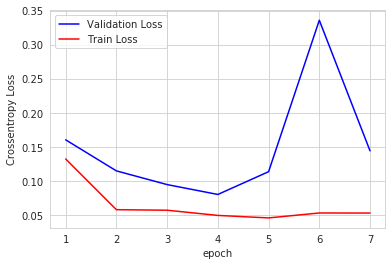

In [0]:
x = list(range(1,7+1))  # as the model stopped at 9th epoch because of early stopping
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty)
confusion_matrix(Y_test, model.predict(X_test))

### Observation:

* As we see in confusion matrix, most of the class are correcly classified. But still there is considerable misclassification between Sitting and Standing

* As we see in graph, loss is not stable. Let's add some Dropout and Batch_norm in next architecture

* Here 96% accuracy is achieved which is greater than Bidirectional LSTM

# Deep CNN + Max pooling + Dropout

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 128, 9, 1024)      26624     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 128, 9, 256)       4194560   
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 64, 4, 256)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 64, 4, 128)        524416    
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 64, 4, 64)         73792     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 2, 64)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 2, 32)       

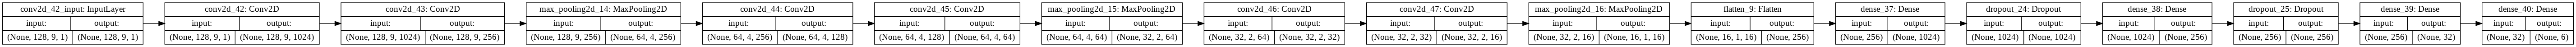

In [0]:
# Simple CNN with one Convolution layer (5x5 kernel) -->  flatten_layer --> dense layer --> Output layer
model = Sequential()
model.add(Conv2D(1024, kernel_size=(5, 5),activation='relu', padding='same', input_shape=(128,9,1)))
model.add(Conv2D(256, kernel_size=(4,4), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(Conv2D(128, kernel_size=(4,4), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Conv2D(16, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(Flatten()) # flattening before sending into dense layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dense(6, activation='softmax'))   # 6 class classification
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, rankdir="LR")

In [0]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test,), callbacks = [es_val_acc])

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 30s 4ms/step - loss: 0.2855 - acc: 0.8728 - val_loss: 0.2191 - val_acc: 0.8950
Epoch 2/30
7352/7352 [==============================] - 26s 3ms/step - loss: 0.1467 - acc: 0.9336 - val_loss: 0.2200 - val_acc: 0.9139
Epoch 3/30
7352/7352 [==============================] - 26s 4ms/step - loss: 0.0832 - acc: 0.9659 - val_loss: 0.1434 - val_acc: 0.9598
Epoch 4/30
7352/7352 [==============================] - 26s 4ms/step - loss: 0.0525 - acc: 0.9788 - val_loss: 0.1120 - val_acc: 0.9591
Epoch 5/30
7352/7352 [==============================] - 26s 3ms/step - loss: 0.0754 - acc: 0.9724 - val_loss: 0.1003 - val_acc: 0.9633
Epoch 6/30
7352/7352 [==============================] - 26s 3ms/step - loss: 0.0533 - acc: 0.9802 - val_loss: 0.0976 - val_acc: 0.9702
Epoch 7/30
7352/7352 [==============================] - 26s 3ms/step - loss: 0.0368 - acc: 0.9839 - val_loss: 0.1005 - val_acc: 0.9700
Epoch 8

Test_accuracy: 0.9678203918022101
Test_Loss: 0.1160719394645581


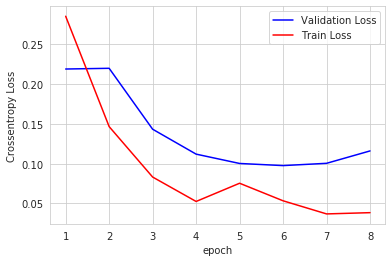

In [0]:
x = list(range(1,8+1))  # as the model stopped at 9th epoch because of early stopping
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty)
score = model.evaluate(X_test, Y_test, verbose=0)
confusion_matrix(Y_test, model.predict(X_test))
print("Test_accuracy: {}".format(score[1]))
print("Test_Loss: {}".format(score[0]))

In [0]:
confusion_matrix(Y_test, model.predict(X_test))

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,537,0,0,0,0,0
SITTING,0,415,71,0,0,5
STANDING,0,81,445,1,0,5
WALKING,0,0,0,493,3,0
WALKING_DOWNSTAIRS,0,0,0,71,349,0
WALKING_UPSTAIRS,0,0,0,28,18,425


## Observation

* As we see Deep CNN with maxpooling and dropout rate have accuracy of 96.7% with loss of 0.11

* Misclasification between sitting and standing is lower than previous CNN architecture



# Summary

In [0]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model no.", "Architecture" ,"Optimizer" ,"Hyperparameter tuned" ,"Test Loss(Cross-Entropy)", "Test Accuracy"]
x.add_row([1,"Double Stacked LSTM with dropout"," adam(lr=0.0001) ","No",0.25614113, 0.874505130 ])
x.add_row([2,"Single LSTM with return_seq"," adam(lr=0.001) ","Grid search on hidden_layer and dropout_rate",0.218, 0.88 ])
x.add_row([3,"Double stacked LSTM"," adam","Grid search on hidden_layer and dropout_rate",0.107, 0.86 ])
x.add_row([4,"Double stacked LSTM (Best params)"," adam","Grid search on Batch_size",0.10472, 0.96131 ])
x.add_row([5,"Stacked Bidirectional LSTM"," adam","Lstm best parms considered",0.157, 0.95696 ])
x.add_row([6,"Simple 2D CNN with 5x5 kernel"," adam","NO",0.154764, 0.9674245 ])
x.add_row([7,"Deep_cnn(5 Conv with kernel + 3 dense)"," adam","NO",0.0535 , 0.9681 ])
x.add_row([8,"Deep_cnn(6 Conv + 3 dense + 3 Maxpool + 3 dropout)"," adam","NO",0.11607193 , 0.96782039 ])

print(x)

+-----------+----------------------------------------------------+-------------------+----------------------------------------------+--------------------------+---------------+
| Model no. |                    Architecture                    |     Optimizer     |             Hyperparameter tuned             | Test Loss(Cross-Entropy) | Test Accuracy |
+-----------+----------------------------------------------------+-------------------+----------------------------------------------+--------------------------+---------------+
|     1     |          Double Stacked LSTM with dropout          |  adam(lr=0.0001)  |                      No                      |        0.25614113        |   0.87450513  |
|     2     |            Single LSTM with return_seq             |   adam(lr=0.001)  | Grid search on hidden_layer and dropout_rate |          0.218           |      0.88     |
|     3     |                Double stacked LSTM                 |        adam       | Grid search on hidden_layer 

## Conclusion:

* To achieve the accuracy of model par with Expert engineered features, various Deep_learning models are tried with Hyperparameter tuning

* LSTM deeper architecture (Stacking) & wider Architecture (Neurons in layers) are fine tuned to find the best params

* Batch_size for LSTM is also tuned to find the best Accuracy

* Bi-directional LSTM stacked with LSTM cell tried 

* 2-D convolutional neural network is tuned with following params as hyper params (Kernel size, Maxpooling layer, Dropout rate, Neurons in Dense layer)

* As we see in the table, the best LSTM has accuarcy of 96.1% which is in par with classical model with 561 Domain Expert engineered features

* The best CNN Architecture have 96.8% accuracy which is in par with classical model with 561 Domain Expert engineered features.

* Our Deep learning model almost abstracted details needed to achieve the classical model with 561 Domain Expert engineered features.

* Best model in terms of accuarcy:
* Deep_cnn > Double stacked LSTM > Bidirectional LSTM + LSTM

* Model_4, Model_6, Model_7, Model_8 outperformed the classical machinelearning model with Expert engineered features in terms of accuracy as metric